# Heart Attack Analysis & Prediction Dataset

### Life cycle of Machine learning Project

##### Understanding the Problem Statement
##### Data Collection
##### Exploratory data analysis
##### Data Cleaning
##### Data Pre-Processing
##### Model Training
##### Choose best model

## Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

### Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv("C:/Users/vanim/Downloads/heart.csv")

**Show Top 5 Records**


In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

**Shape of the dataset**

In [5]:
df.shape

(303, 14)

**Summary of the dataset**

In [7]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

**Check Datatypes in the dataset**

In [8]:
# Check Null and Dtypes
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##  EXPLORING DATA

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

We have 0 categorical features : []


### Feature Information
**Variable Explanation:**
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **caa:** number of major vessels (0-4)
* **cp:** Chest Pain type chest pain type Value 0: typical angina Value 1: atypical angina Value 2: non-anginal pain Value 3: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **cho:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* **rest_ecg:** resting electrocardiographic results Value 0: normal Value 1: having ST-T wave abnormality 
(T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **output:** 0= less chance of heart attack 1= more chance of heart attack


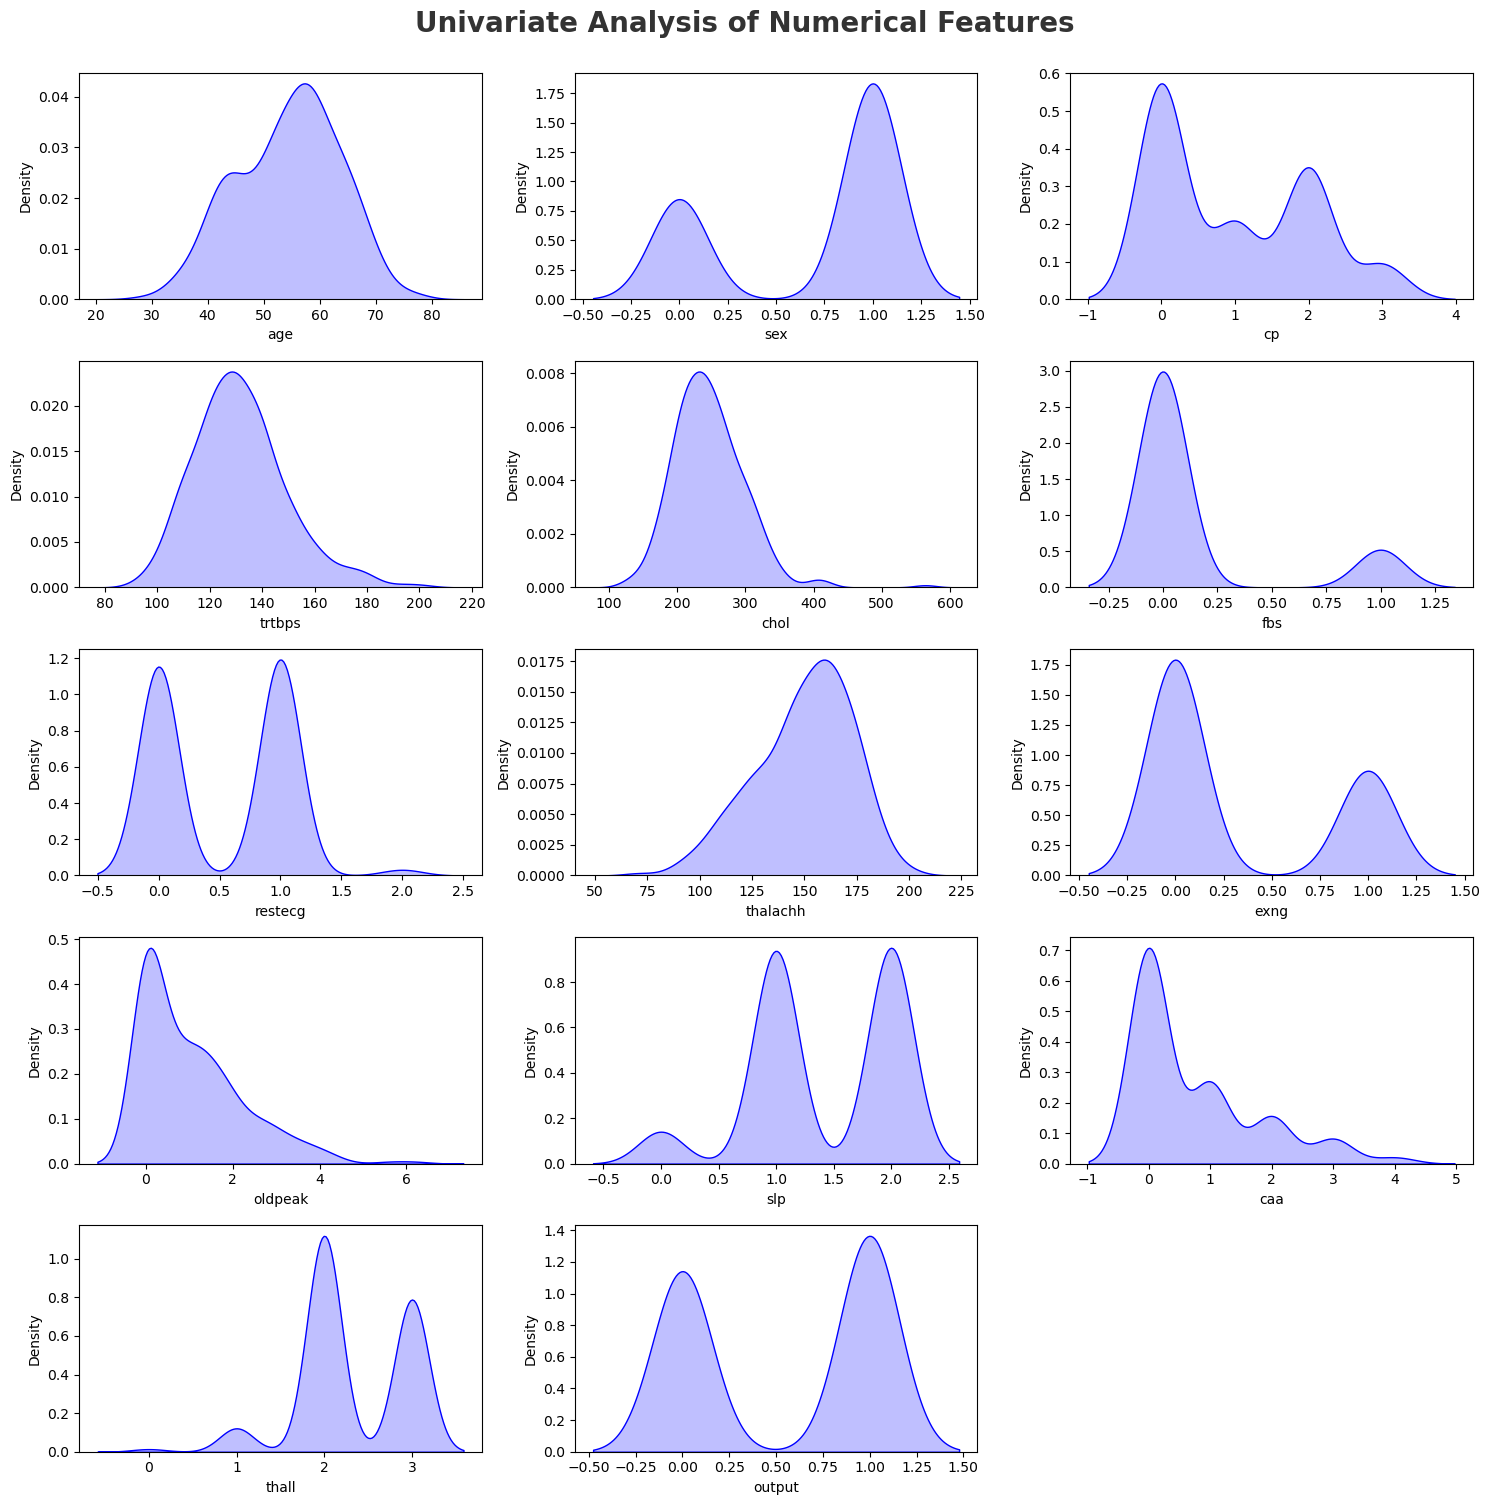

In [19]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [20]:
df.corr(numeric_only=True) 

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

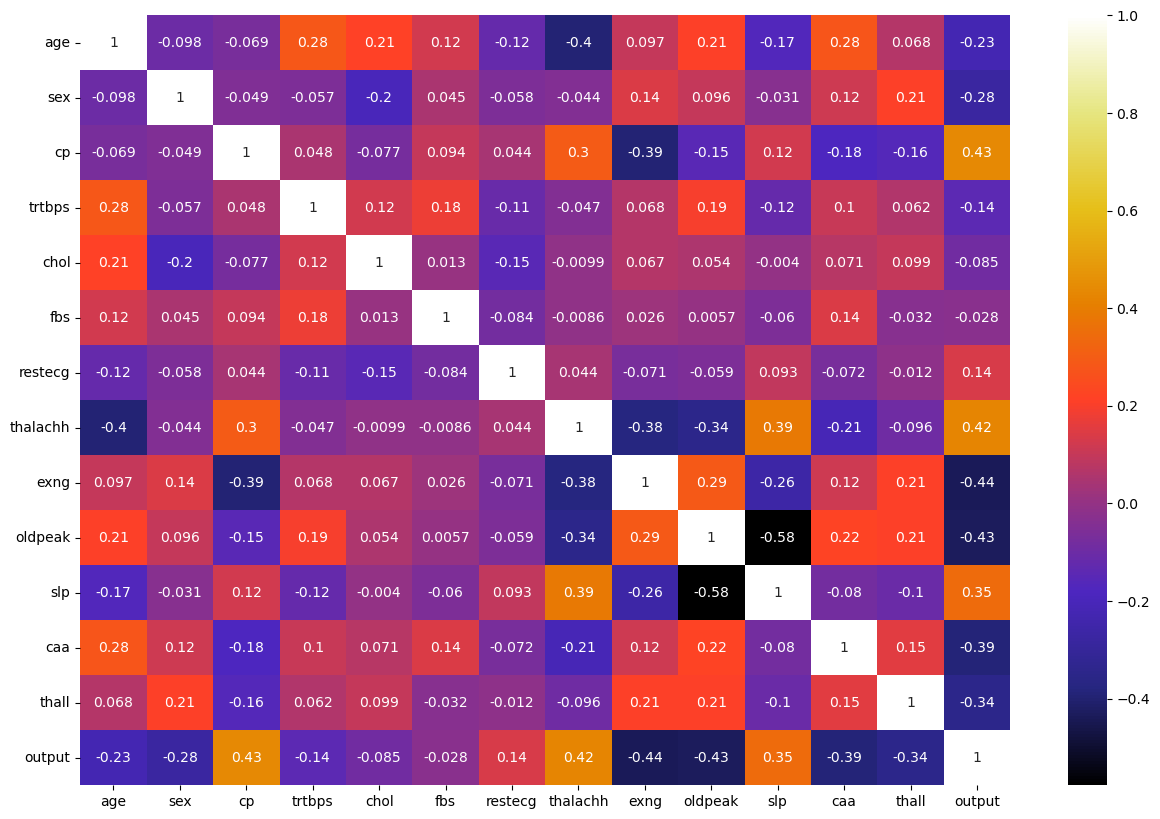

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(numeric_only=True ), cmap="CMRmap", annot=True)
plt.show()

### Checking Null Values

In [22]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [23]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [24]:
df["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [25]:
df["trtbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [26]:
df["chol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [27]:
df["thalachh"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [28]:
df["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

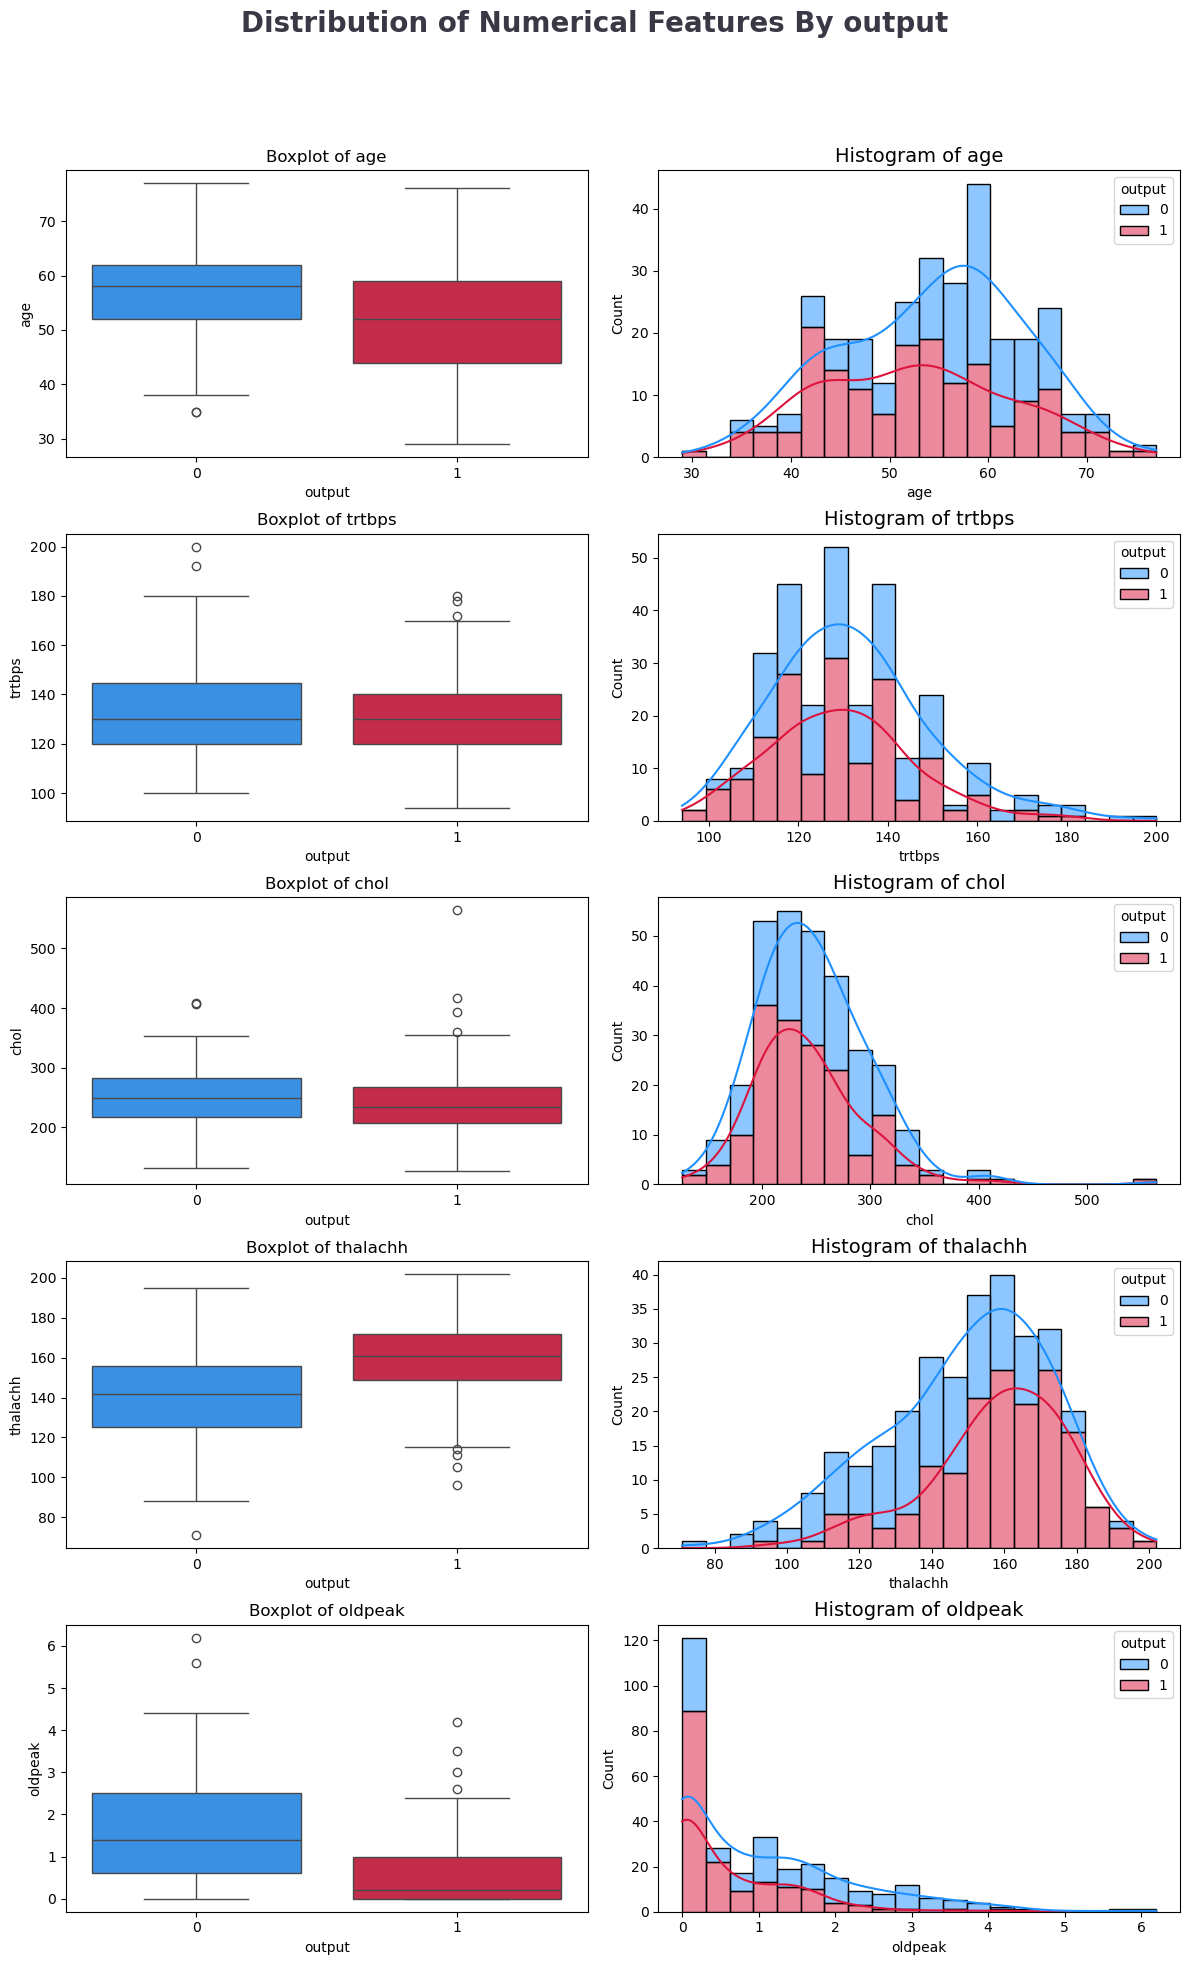

In [29]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(5, 2, figsize=(12,20))
fig.suptitle('Distribution of Numerical Features By output', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='output', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='output', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

###  Visualize the Target Feature

In [33]:
df1 = df.copy()
df1['output'] = np.where((df.output == 1),'Heart Diseases', 'No Heart Diseases' )
df1.output.value_counts(normalize=True)*100

output
Heart Diseases       54.455446
No Heart Diseases    45.544554
Name: proportion, dtype: float64

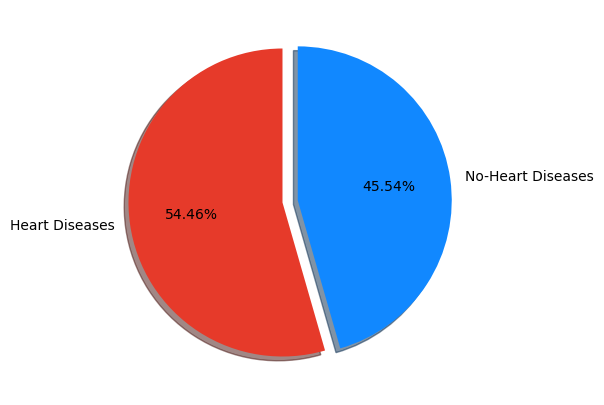

In [31]:
percentage = df1.output.value_counts(normalize=True)*100
labels = ["Heart Diseases","No-Heart Diseases"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0, 0.1)
colors = ['#e63a2a', '#1188ff']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [34]:
df1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

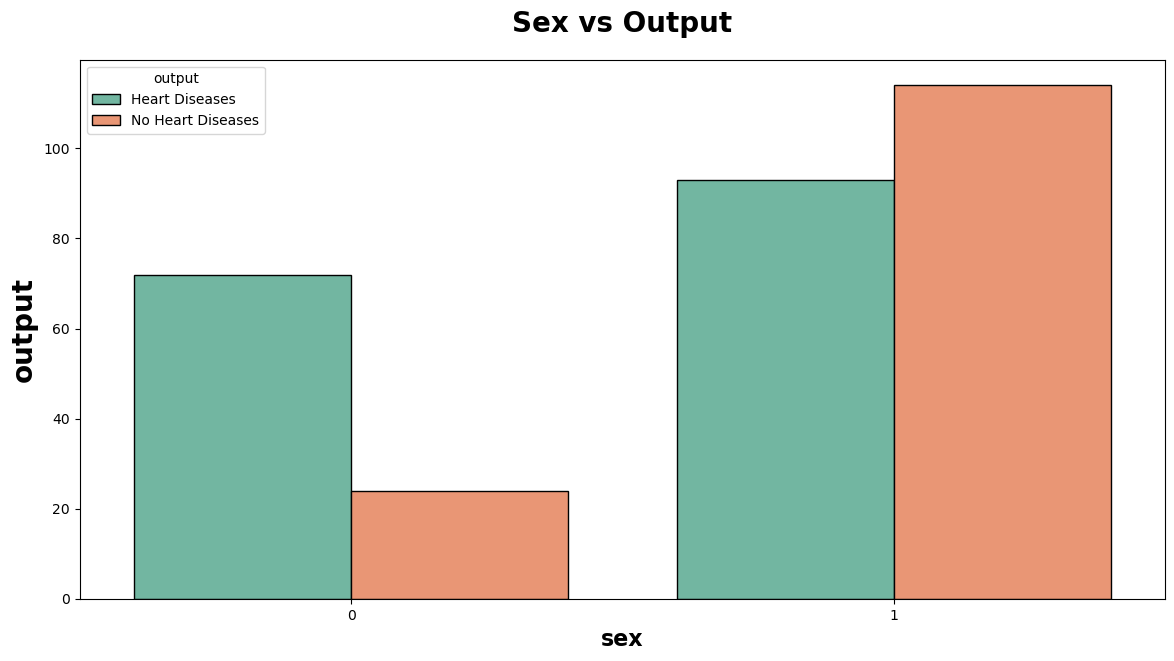

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="sex",hue="output", data=df1,ec = "black",palette="Set2")
plt.title("Sex vs Output", weight="bold",fontsize=20, pad=20)
plt.ylabel("output", weight="bold", fontsize=20)
plt.xlabel("sex", weight="bold", fontsize=16)
plt.show()

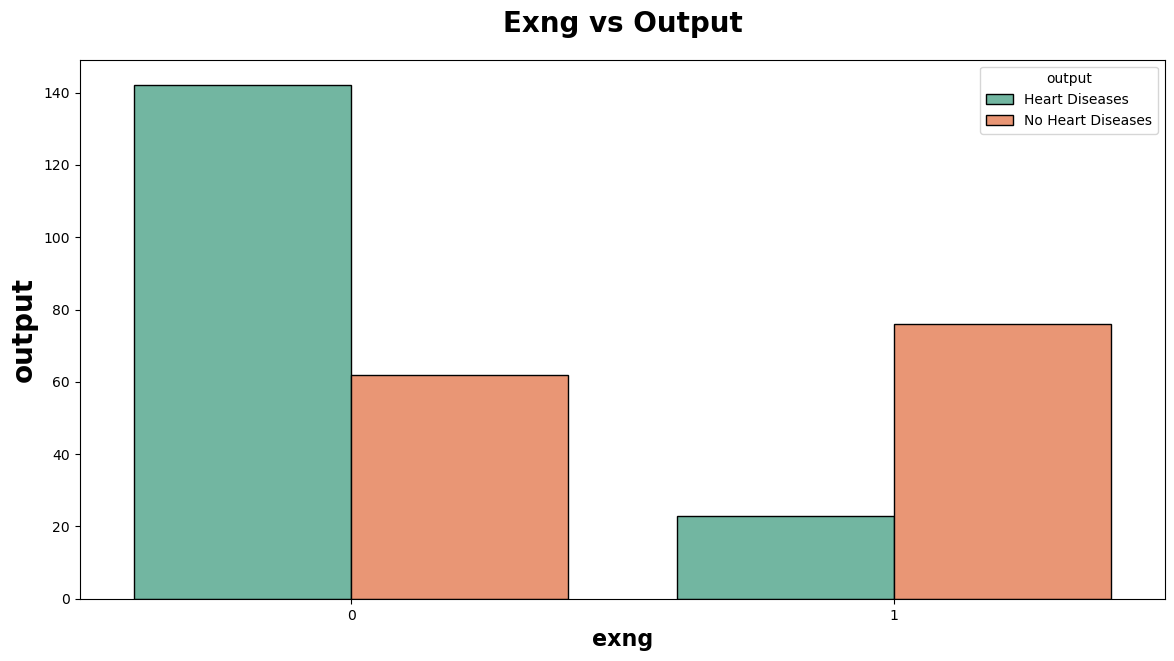

In [36]:
plt.subplots(figsize=(14,7))
sns.countplot(x="exng",hue="output", data=df1,ec = "black",palette="Set2")
plt.title("Exng vs Output", weight="bold",fontsize=20, pad=20)
plt.ylabel("output", weight="bold", fontsize=20)
plt.xlabel("exng", weight="bold", fontsize=16)
plt.show()

In [37]:

# Function: Copy-pasted from question and modified
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['age'], bins=[0,30,60,100], labels=["young","middle_aged","old"])
    return df

# Call function
df = get_num_people_by_age_category(df1)

In [38]:
df1.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall          output    age_group  
0    0      1  Heart Diseases          old  
1    0      2  Heart Diseases  middle_aged  
2    0      2  Heart Diseases  middle_aged  
3    0      2  Heart Diseases  middle_aged  
4    0      2  Heart Diseases  middle_aged

In [39]:
df1.age_group.value_counts()

age_group
middle_aged    223
old             79
young            1
Name: count, dtype: int64

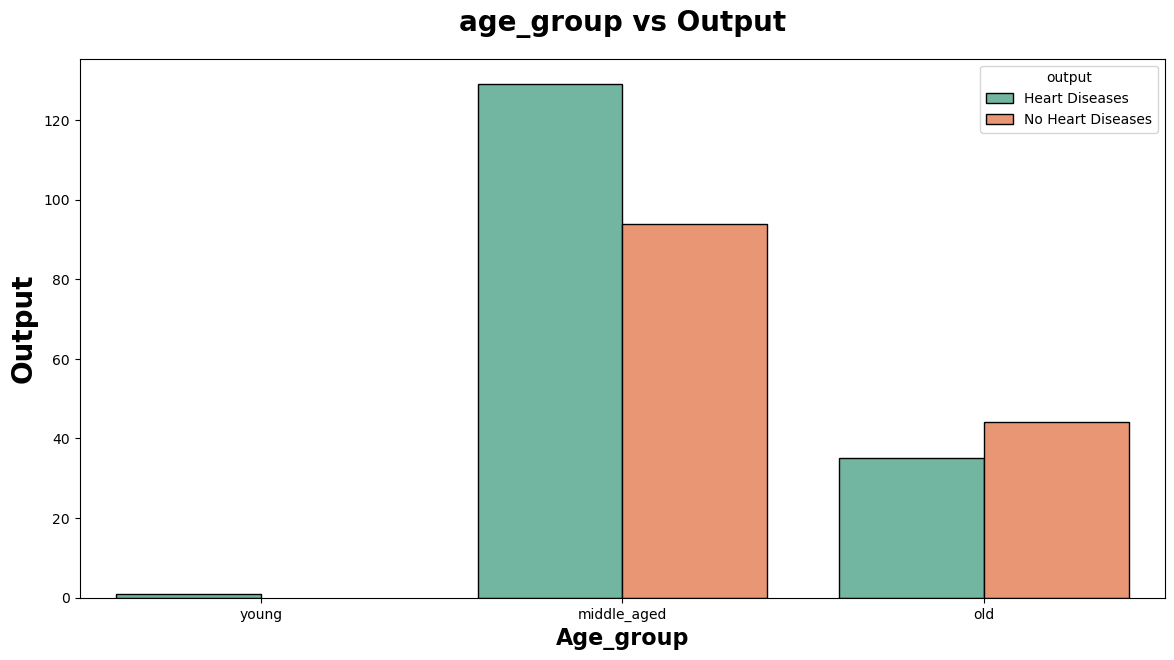

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x="age_group",hue="output", data=df1,ec = "black",palette="Set2")
plt.title("age_group vs Output", weight="bold",fontsize=20, pad=20)
plt.ylabel("Output", weight="bold", fontsize=20)
plt.xlabel("Age_group", weight="bold", fontsize=16)
plt.show()

#### Check Null Values

In [41]:
df.isnull().sum()

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          0
caa          0
thall        0
output       0
age_group    0
dtype: int64

In [43]:
df.duplicated().sum()

1

**Numeric Features**

In [44]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 14


**Discrete Features**

In [45]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 9


**Continues Features**

In [46]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


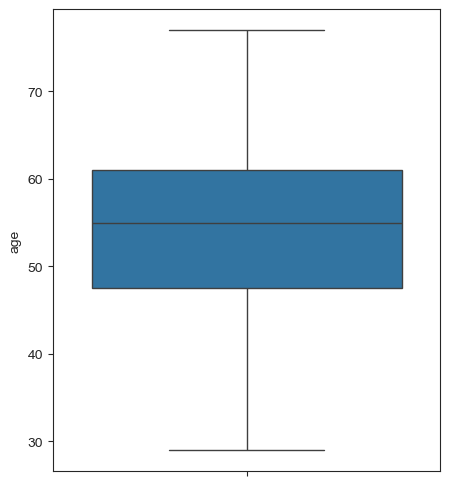

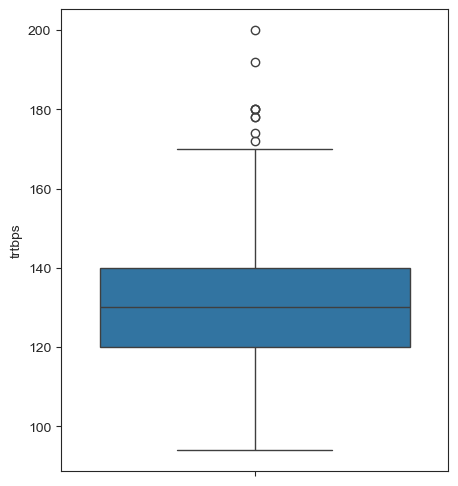

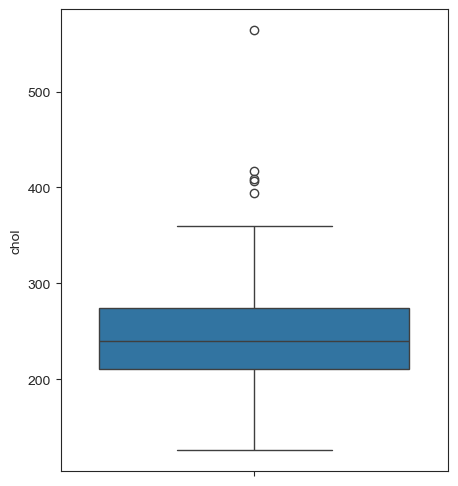

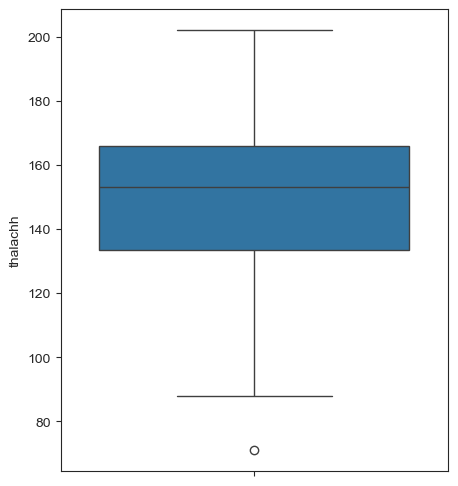

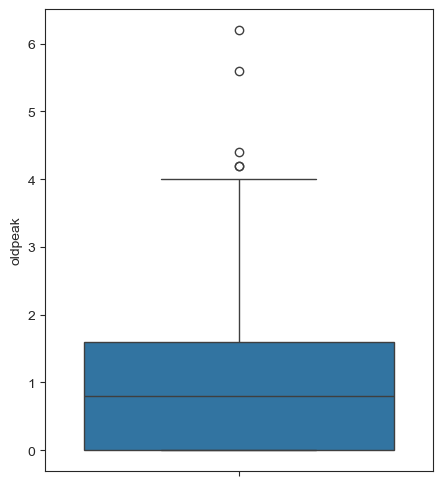

In [47]:
for i in continuous_features:
        plt.figure(figsize=(5,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [48]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df




In [49]:
for col in continuous_features:
         detect_outliers(col)


 #### age ####
percentile25 47.5
percentile75 61.0
Upper limit 81.25
Lower limit 27.25

 #### trtbps ####
percentile25 120.0
percentile75 140.0
Upper limit 170.0
Lower limit 90.0

 #### chol ####
percentile25 211.0
percentile75 274.5
Upper limit 369.75
Lower limit 115.75

 #### thalachh ####
percentile25 133.5
percentile75 166.0
Upper limit 214.75
Lower limit 84.75

 #### oldpeak ####
percentile25 0.0
percentile75 1.6
Upper limit 4.0
Lower limit -2.4000000000000004


In [50]:
df[continuous_features].skew(axis=0, skipna=True)

age        -0.202463
trtbps      0.386367
chol        0.333267
thalachh   -0.493392
oldpeak     0.997885
dtype: float64

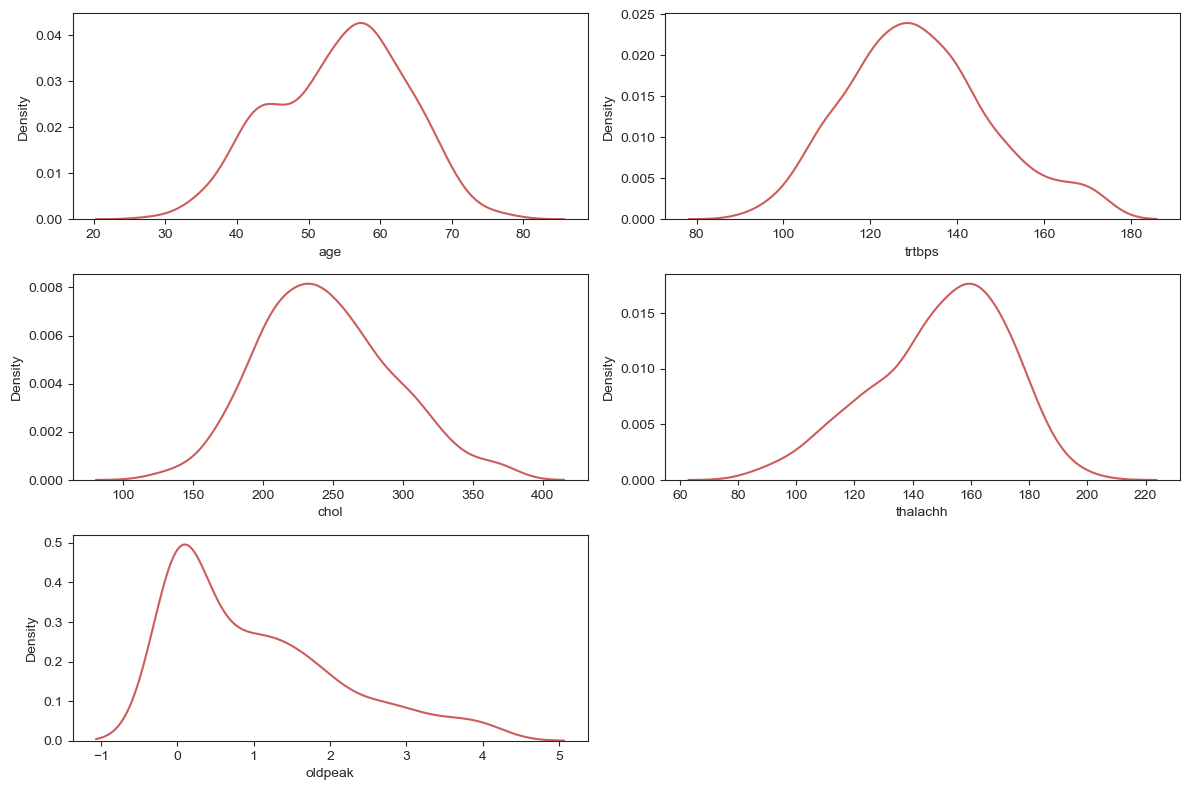

In [51]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

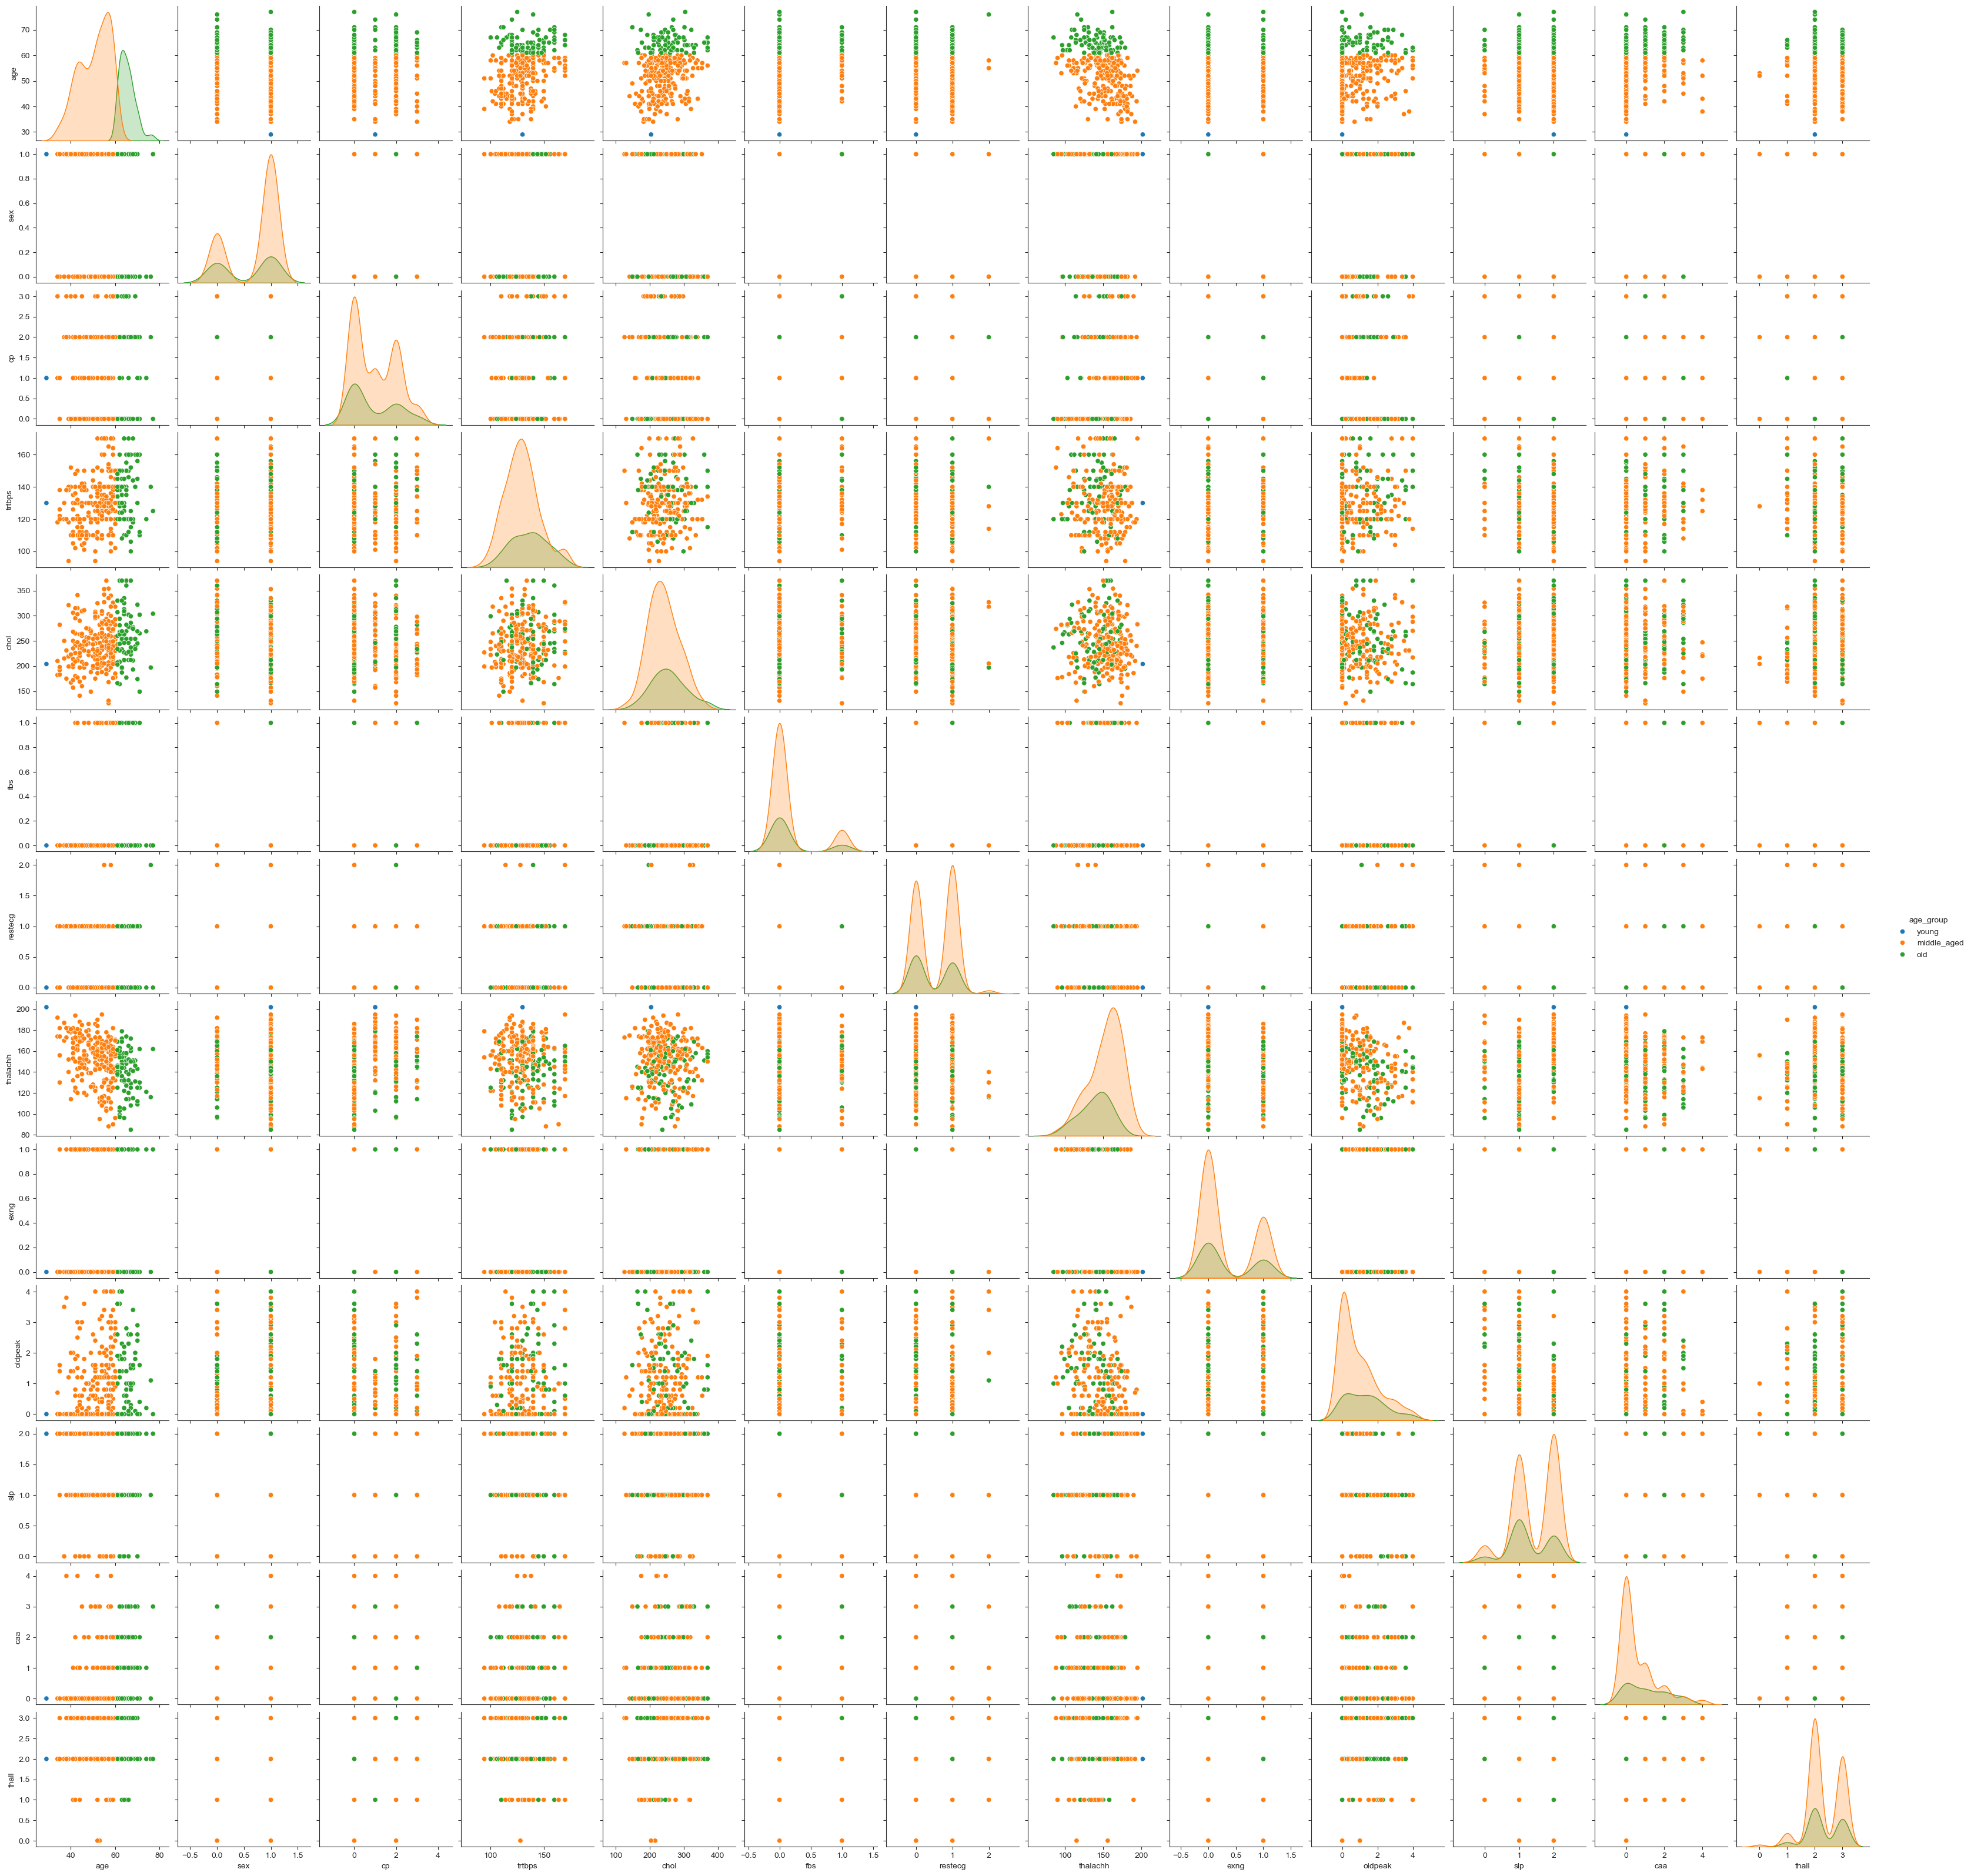

In [52]:
sns.pairplot(data=df1,hue='age_group')

In [69]:
data=pd.read_csv("C:/Users/vanim/Downloads/heart.csv")
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [76]:

from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = data.drop(columns=["output"], axis=1)  # Features
y = data["output"]   # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
X_train

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
132   42    1   1     120   295    0        1       162     0      0.0    2   
202   58    1   0     150   270    0        0       111     1      0.8    2   
196   46    1   2     150   231    0        1       147     0      3.6    1   
75    55    0   1     135   250    0        0       161     0      1.4    1   
176   60    1   0     117   230    1        1       160     1      1.4    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
188   50    1   2     140   233    0        1       163     0      0.6    1   
71    51    1   2      94   227    0        1       154     1      0.0    2   
106   69    1   3     160   234    1        0       131     0      0.1    1   
270   46    1   0     120   249    0        0       144     0      0.8    2   
102   63    0   1     140   195    0        1       179     0      0.0    2   

     caa  thall  
132    0      2  
202    0      3  
196    0      2  
75     0      2  
176    2      3  
..   ...    ...  
188    1      3  
71     1      3  
106    1      2  
270    0      3  
102    2      2  

[242 rows x 13 columns]

In [78]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 242, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame for easy inspection (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaled Training Data:")
print(X_train_scaled_df)
print("\nScaled Testing Data:")
print(X_test_scaled_df)


Scaled Training Data:
          age       sex        cp    trtbps      chol       fbs   restecg  \
0   -1.356798  0.722504  0.008099 -0.616856  0.914034 -0.383301  0.843133   
1    0.385086  0.722504 -0.971891  1.169491  0.439527 -0.383301 -1.046109   
2   -0.921327  0.722504  0.988089  1.169491 -0.300704 -0.383301  0.843133   
3    0.058483 -1.384075  0.008099  0.276318  0.059921 -0.383301 -1.046109   
4    0.602822  0.722504 -0.971891 -0.795490 -0.319684  2.608918  0.843133   
..        ...       ...       ...       ...       ...       ...       ...   
237 -0.485856  0.722504  0.988089  0.574042 -0.262744 -0.383301  0.843133   
238 -0.376988  0.722504  0.988089 -2.165023 -0.376625 -0.383301  0.843133   
239  1.582631  0.722504  1.968079  1.764940 -0.243763  2.608918 -1.046109   
240 -0.921327  0.722504 -0.971891 -0.616856  0.040941 -0.383301 -1.046109   
241  0.929425 -1.384075  0.008099  0.574042 -0.983994 -0.383301  0.843133   

     thalachh      exng   oldpeak       slp       caa

# Model selection

In [56]:
!pip install xgboost
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 581.0 kB/s eta 0:03:35
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:50
   ---------------------------------------- 0.5/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 1.0/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 1.6/124.9 MB 4.7 MB/s eta 0:00:26
    --------------------------------------- 1.9/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 2.1/124.9 MB 5.1 MB/s eta 0:00:24
    --------------------------------------- 2.1/124.9 MB 5.1 MB/s eta 0:00:24
    --------------------------------------- 2.1/124.9 MB 5.1 MB/s eta 0:00

In [80]:
# Importing classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Importing evaluation metrics
from sklearn.metrics import (accuracy_score, classification_report, ConfusionMatrixDisplay, 
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

# Additional classifiers from external libraries
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [93]:
models={
    "Random Forest":RandomForestClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
    "GradientBoosting":GradientBoostingClassifier(),
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "Support vector Classifer":SVC(),
    "Naive bayes":GaussianNB(),
    "XGBClassifier":XGBClassifier(),
    "CatBoostClassifier":CatBoostClassifier()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled_df,y_train)# train model

    # Make Predictions
    y_train_pred=model.predict(X_train_scaled_df)
    y_test_pred=model.predict(X_test_scaled_df)


    # Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred) #calculate accuracy
    model_train_f1=f1_score(y_train,y_train_pred,average="weighted") #calculate f1_score
    model_train_precision=precision_score(y_train,y_train_pred) #calculate precision
    model_train_recall=recall_score(y_train,y_train_pred) #calcuate recall
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred) # calculate roc_auc_score


    model_test_accuracy=accuracy_score(y_test,y_test_pred) #calculate accuracy
    model_test_f1=f1_score(y_test,y_test_pred,average="weighted") #calculate f1_score
    model_test_precision=precision_score(y_test,y_test_pred) #calculate precision
    model_test_recall=recall_score(y_test,y_test_pred) #calcuate recall
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred) # calculate roc_auc_score


    print(list(models.keys())[i])


    print("model performance for Training set")
    print("- Accuracy:{:.4f}".format(model_train_accuracy))
    print("- F1 scre:{:.4f}".format(model_train_f1))
    print("- Precision:{:.4f}".format(model_train_precision))
    print("- Recall:{:.4f}".format(model_train_recall))
    print("- rocauc_score:{:.4f}".format(model_train_rocauc_score))


    print("-" * 35)
    
    
    print("model performance for Test set")
    print("- Accuracy:{:.4f}".format(model_test_accuracy))
    print("- F1 scre:{:.4f}".format(model_test_f1))
    print("- Precision:{:.4f}".format(model_test_precision))
    print("- Recall:{:.4f}".format(model_test_recall))
    print("- rocauc_score:{:.4f}".format(model_test_rocauc_score))


    print("=" * 35)
    print("\n")
    
    
    
    

Random Forest
model performance for Training set
- Accuracy:1.0000
- F1 scre:1.0000
- Precision:1.0000
- Recall:1.0000
- rocauc_score:1.0000
-----------------------------------
model performance for Test set
- Accuracy:0.8525
- F1 scre:0.8523
- Precision:0.8485
- Recall:0.8750
- rocauc_score:0.8513


DecisionTree
model performance for Training set
- Accuracy:1.0000
- F1 scre:1.0000
- Precision:1.0000
- Recall:1.0000
- rocauc_score:1.0000
-----------------------------------
model performance for Test set
- Accuracy:0.8197
- F1 scre:0.8192
- Precision:0.8889
- Recall:0.7500
- rocauc_score:0.8233


GradientBoosting
model performance for Training set
- Accuracy:1.0000
- F1 scre:1.0000
- Precision:1.0000
- Recall:1.0000
- rocauc_score:1.0000
-----------------------------------
model performance for Test set
- Accuracy:0.7869
- F1 scre:0.7870
- Precision:0.8065
- Recall:0.7812
- rocauc_score:0.7872


LogisticRegression
model performance for Training set
- Accuracy:0.8636
- F1 scre:0.8627
- P

In [94]:

# Initialize a few parameters for Hyperparameter tuning

# KNeighbors Classifier parameters
knn_params = {
    "n_neighbors": [2, 3, 10, 20, 40, 50]
}

# RandomForest Classifier parameters
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

# XGBoost Classifier parameters
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
}

# CatBoost Classifier parameters
cat_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30]
}

# Models list for Hyperparameter tuning
randomcv_models = {
    "KNN": (KNeighborsClassifier(), knn_params),
    "RF": (RandomForestClassifier(), rf_params),
    "XGBoost": (XGBClassifier(), xgboost_params),
    "CatBoost": (CatBoostClassifier(), cat_params)
}


In [96]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
# Iterate over the dictionary items
for name, (model, params) in randomcv_models.items():
    print(f"Tuning {name}...")

    # Initialize RandomizedSearchCV for each model
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,  # Number of iterations for random search
                                cv=3,        # Cross-validation folds
                                verbose=2,   # Verbosity for monitoring the process
                                n_jobs=-1)   # Use all processors
    
    # Fit the model
    random.fit(X_train_scaled_df, y_train)
    
    # Store the best parameters
    model_param[name] = random.best_params_

# Print the best parameters for each model
for model_name in model_param:
    print(f"-----------------Best params for {model_name} -------------------------------------")
    print(model_param[model_name])


Tuning KNN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning RF...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Tuning XGBoost...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Tuning CatBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6199527	total: 26.9ms	remaining: 26.9s
1:	learn: 0.5669212	total: 78.6ms	remaining: 39.2s
2:	learn: 0.5120322	total: 92.9ms	remaining: 30.9s
3:	learn: 0.4725987	total: 95.9ms	remaining: 23.9s
4:	learn: 0.4361220	total: 151ms	remaining: 30s
5:	learn: 0.4018843	total: 198ms	remaining: 32.7s
6:	learn: 0.3757555	total: 212ms	remaining: 30.1s
7:	learn: 0.3503873	total: 259ms	remaining: 32.1s
8:	learn: 0.3199980	total: 311ms	remaining: 34.3s
9:	learn: 0.2989434	total: 363ms	remaining: 35.9s
10:	learn: 0.2794142	total: 388ms	remaining: 34.9s
11:	learn: 0.2707013	total: 390ms	remaining: 32.1s
12:	learn: 0.2552621	total: 437ms	remaining: 33.2s
13:	learn: 0.2419342	total: 464ms	

# Retrain the model with best prara metres

In [99]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=8, max_features=5, max_depth=5),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=3),
    "XGBoost Classifier": XGBClassifier(n_estimators=300, max_depth=12, learning_rate=0.01, colsample_bytree=0.3),
    "CatBoosting Classifier": CatBoostClassifier(max_depth=12, learning_rate=0.1)
}

# Loop through each model for training and evaluation
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

   
    # Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred) #calculate accuracy
    model_train_f1=f1_score(y_train,y_train_pred,average="weighted") #calculate f1_score
    model_train_precision=precision_score(y_train,y_train_pred) #calculate precision
    model_train_recall=recall_score(y_train,y_train_pred) #calcuate recall
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred) # calculate roc_auc_score


    model_test_accuracy=accuracy_score(y_test,y_test_pred) #calculate accuracy
    model_test_f1=f1_score(y_test,y_test_pred,average="weighted") #calculate f1_score
    model_test_precision=precision_score(y_test,y_test_pred) #calculate precision
    model_test_recall=recall_score(y_test,y_test_pred) #calcuate recall
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred) # calculate roc_auc_score

    print(list(models.keys())[i])


    print("model performance for Training set")
    print("- Accuracy:{:.4f}".format(model_train_accuracy))
    print("- F1 scre:{:.4f}".format(model_train_f1))
    print("- Precision:{:.4f}".format(model_train_precision))
    print("- Recall:{:.4f}".format(model_train_recall))
    print("- rocauc_score:{:.4f}".format(model_train_rocauc_score))


    print("-" * 35)
    
    
    print("model performance for Test set")
    print("- Accuracy:{:.4f}".format(model_test_accuracy))
    print("- F1 scre:{:.4f}".format(model_test_f1))
    print("- Precision:{:.4f}".format(model_test_precision))
    print("- Recall:{:.4f}".format(model_test_recall))
    print("- rocauc_score:{:.4f}".format(model_test_rocauc_score))


    print("=" * 35)
    print("\n")


Random Forest
model performance for Training set
- Accuracy:0.6942
- F1 scre:0.6697
- Precision:0.6578
- Recall:0.9248
- rocauc_score:0.6688
-----------------------------------
model performance for Test set
- Accuracy:0.7049
- F1 scre:0.6977
- Precision:0.6750
- Recall:0.8438
- rocauc_score:0.6977


K-Neighbors Classifier
model performance for Training set
- Accuracy:0.4504
- F1 scre:0.2797
- Precision:0.0000
- Recall:0.0000
- rocauc_score:0.5000
-----------------------------------
model performance for Test set
- Accuracy:0.4754
- F1 scre:0.3064
- Precision:0.0000
- Recall:0.0000
- rocauc_score:0.5000


XGBoost Classifier
model performance for Training set
- Accuracy:0.6570
- F1 scre:0.5924
- Precision:0.6157
- Recall:1.0000
- rocauc_score:0.6193
-----------------------------------
model performance for Test set
- Accuracy:0.7377
- F1 scre:0.7140
- Precision:0.6667
- Recall:1.0000
- rocauc_score:0.7241


0:	learn: 0.6199527	total: 15.4ms	remaining: 15.4s
1:	learn: 0.5669212	total: 47

# final selection model

** After comparing multiple machine learning models such as Random Forest, K-Neighbors Classifier, XGBoost, and CatBoost,
** we found that Logistic Regression performed exceptionally well in most cases. Despite its simplicity, 
** Logistic Regression consistently provided accurate and reliable results, especially in situations 
** where interpretability and efficiency were crucial

In [100]:
! pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [102]:
import pandas Profiling

SyntaxError: invalid syntax (2944365182.py, line 1)

In [105]:
! pip install ydata-profiling


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   ------------ --------------------------- 112.6/356.2 kB 3.2 MB/s eta 0:00:01
   ------------------------- -------------- 225.3/356.2 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 356.2/356.2 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/104.8 kB ? eta -:--:--
   ---------------------------------------- 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -------------------------------- ------- 245.8/301.4 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/28.1 MB 4.5 MB/s eta 0:00:07
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [106]:
from ydata_profiling import ProfileReport


In [107]:
pd= ProfileReport(data)

In [108]:
pd

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]